# Python Tutorial III: Modules and Classes

In today's tutorial we'll learn how to build our own python modules and classes.  We'll start with modules:

## Modules

### When to use:
* Your script gets very long and you want to have easier maintenance. 
* You want to reuse a function in several programs or scripts without copy/paste.
* Performance reasons.

### What is it?
* A file containing Python definitions and statements.
* The file name is the module name with the suffix .py appended.
* Within a module, the module's name is available as the valuable of the global variable *__name__*.

Let's look at an example:

In [1]:
# module difference.py
def for_diff(function,x=0,h=.1):
    deriv=(function(x+h)-function(x))/h
    return deriv

def back_diff(function,x=0,h=.1):
    deriv=(function(x)-function(x-h))/h
    return deriv

def cent_diff(function,x=0,h=.1):
    deriv=(function(x+h)-function(x-h))/(2*h)
    return derive

We **import** modules just like we import libraries like numpy, math, and scipy

<function matplotlib.pyplot.show>

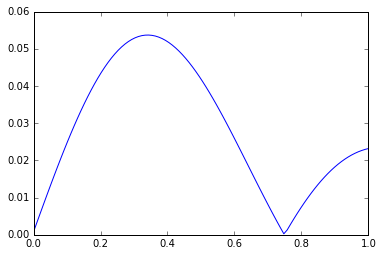

In [3]:
%matplotlib inline   
import differences as diff
import matplotlib.pyplot as plt
import numpy as np

def myfun(x=0):
    import numpy as np
    return np.exp(-x**2)*np.sin(np.pi*x)

def myder(x=0):
    from math import sin,exp,pi
    temp=np.exp(-x**2)
    return temp*(pi*np.cos(np.pi*x)-2*x*np.sin(np.pi*x))
    
X=np.linspace(0,1,100)
dX=diff.for_diff(myfun,X,.01)
abs_err=np.abs(dX-myder(X))

plt.plot(X,abs_err)
plt.show



## Where does the module file need to go?

Say you are trying to **import spam**.

When imported, the interpreter searches for spam in(in order):
1. A built-in module with that name. 
2. *spam.py* in a list of directories given by the variable *sys.path*. 
    1. The directory containing the input script (or the current directory when no file is specified).
    2. PYTHONPATH (a list of directory names, syntax as shell variable PATH).
    3. The installation-dependent default.

## Generaliztions of Modules: Packages

Packages are modules with a directory structure.  Some of the modules with the dot.dot reference (e.g. matplotlib.pyplot.plot).  If you want to develop a well-comparmentalized package you can look at online help.

 

## Classes

Classes are a basic feature of object-oriented programming.  They are a little more complex than the *struct* features in Matlab.

In [5]:
class myClass:
    #Class attributes are variables that are shared by all objects of this class
    teacher='Varis Carey'
    off_hours='MW 1-2 TR 12:30-1:30'
    #instance variables are variables particular to an instance of the class and are
    #set in the CONSTRUCTOR
    def __init__(self,name,room):
        self.name=name
        self.room=room
        self.students=[] #empty student list
    
    #We can have other function within myclass-here is a METHOD to add_students
    def add_student(self,name):
        self.students.append(name)

c=myClass('M5660','AB4017')
d=myClass('M4650','AB4125')
print c.name
c.add_student('Michael')
c.add_student('Megan')
print c.students
print d.students

    

M5660
['Michael', 'Megan']
[]


Let's look at an example where we encounter another example of classical object oriented programming, **Inheritance**.

There's a file in the Tutuorial II directory that has the *solvers* module which contains classes used in this example.

In [6]:
class Solver:
    
    def __init__(self,function,start=0,tolerance=1E-8,maxiter=20):
        self.fn=function
        self.guess=start
        self.tolerance=tolerance
        self.maxiter=20
        self.iteration=0  #iteration counter
        self.root=None
    
    def state(self):
        print 'Iterate=',self.guess
        print 'Residual=',abs(self.fn(self.guess))
        print 'Iteration=',self.iteration
        if self.root!=None:
            print 'Root=',self.root

class BracketSolver(Solver):
    def __init__(self,function,guess=0,tolerance=1E-8,maxiter=20,left=-1,right=1):
            Solver.__init__(self,function,guess,tolerance,maxiter)
            self.left=left
            self.right=right
            self.lval=self.fn(left)
            self.rval=self.fn(right)
            if self.lval*self.rval > 0:
                print 'Warning: No Root guarantee',self.fn(left),self.fn(right)
            if self.left >= self.right:
                print 'Warning, Invalid Interval'
            
    def solve(self,type='bisection'):
            self.iteration+=1
            while self.iteration < self.maxiter:
                if type=='bisection':
                    self.guess=.5*(self.left+self.right) #bisect bracket
                    test=self.fn(self.guess)
                    if abs(test)<self.tolerance:  #we found a root
                        self.root=self.guess
                        return 
                    else:   #iterate
                        if self.lval*test < 0:
                            self.rval=test
                            self.right=self.guess
                            self.iteration+=1
                        else:
                            self.lval=test
                            self.left=self.guess
                            self.iteration+=1

def myfun(x):
    from math import cos
    return cos(x)-x

g=BracketSolver(myfun)
g.state()
g.solve()
g.state()
h=BracketSolver(myfun,left=g.left,right=g.right)
h.state()
h.solve()
h.state()


                            

Iterate= 0
Residual= 1.0
Iteration= 0
Iterate= 0.739086151123
Residual= 1.7035832659e-06
Iteration= 20
Iterate= 0
Residual= 1.0
Iteration= 0
Iterate= 0.739085137844
Residual= 7.7470245774e-09
Iteration= 6
Root= 0.739085137844


The inherited class (or subclass) can override methods(think functions) and attributes in the base class.  

In [8]:
class Solver:
    
    def __init__(self,function,start=0,tolerance=1E-8,maxiter=20):
        self.fn=function
        self.guess=start
        self.tolerance=tolerance
        self.maxiter=20
        self.iteration=0  #iteration counter
        self.root=None
    
    def state(self):
        print 'Iterate=',self.guess
        print 'Residual=',abs(self.fn(self.guess))
        print 'Iteration=',self.iteration
        if self.root!=None:
            print 'Root=',self.root

class BracketSolver(Solver):
    def __init__(self,function,guess=0,tolerance=1E-8,maxiter=20,left=-1,right=1):
            Solver.__init__(self,function,guess,tolerance,maxiter)
            self.left=left
            self.right=right
            self.lval=self.fn(left)
            self.rval=self.fn(right)
            if self.lval*self.rval > 0:
                print 'Warning: No Root guarantee',self.fn(left),self.fn(right)
            if self.left >= self.right:
                print 'Warning, Invalid Interval'
            
    def solve(self,type='bisection'):
            self.iteration+=1
            while self.iteration < self.maxiter:
                if type=='bisection':
                    self.guess=.5*(self.left+self.right) #bisect bracket
                    test=self.fn(self.guess)
                    if abs(test)<self.tolerance:  #we found a root
                        self.root=self.guess
                        return 
                    else:   #iterate
                        if self.lval*test < 0:
                            self.rval=test
                            self.right=self.guess
                            self.iteration+=1
                        else:
                            self.lval=test
                            self.left=self.guess
                            self.iteration+=1
    def state(self):
        print 'Interval=[',self.left,',',self.right,']'
        #now call Solver's state function but you must call it directly!
        Solver.state(self)
    

def myfun(x):
    from math import cos
    return cos(x)-x

g=BracketSolver(myfun)
g.state()
g.solve()
g.state()
h=BracketSolver(myfun,left=g.left,right=g.right)
h.state()
h.solve()
h.state()


                            

Interval=[ -1 , 1 ]
Iterate= 0
Residual= 1.0
Iteration= 0
Interval=[ 0.739082336426 , 0.739086151123 ]
Iterate= 0.739086151123
Residual= 1.7035832659e-06
Iteration= 20
Interval=[ 0.739082336426 , 0.739086151123 ]
Iterate= 0
Residual= 1.0
Iteration= 0
Interval=[ 0.739085078239 , 0.739085197449 ]
Iterate= 0.739085137844
Residual= 7.7470245774e-09
Iteration= 6
Root= 0.739085137844


# Basics of Profiling:

## Timeit module

We saw an example of using the  *timeit* module  to test basic arithmetic operations in lecture
.  Let's write two easy functions to test "vectorizing" code.




In [9]:

def dotprod(vec1,vec2):
    
    sum=0
    for x in xrange(1000):
        sum+=vec1[x]*vec2[x]
    return sum

def vecdotprod(vec1,vec2):
    sum=np.dot(vec1,vec2)
    return sum

import timeit
print(timeit.timeit("dotprod(vec1,vec2)", setup="from __main__ import dotprod;import numpy as np;vec1=np.random.rand(1000);vec2=np.random.rand(1000)",number=1000))
print(timeit.timeit("vecdotprod(vec1,vec2)", setup="from __main__ import vecdotprod;import numpy as np;vec1=np.random.rand(1000);vec2=np.random.rand(1000)",number=1000))


0.413201093674
0.000959157943726


Python has its own profile module, *cprofile* or *profile*.  cProfile.run will execute a profile of a function(or a script), while runctx allows you to do more complicated passing 
arguments.  

In [10]:
import cProfile,math
v1=np.random.rand(1000)
v2=np.random.rand(1000)

cProfile.run('math.factorial(40)')
cProfile.runctx('dotprod(v1,v2)',globals(),locals())
cProfile.runctx('vecdotprod(v1,v2)',globals(),locals())

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {math.factorial}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         3 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 <ipython-input-9-6855f4ebdd86>:2(dotprod)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         4 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-9-6855f4ebdd86>:9(vecd

For finer-grain control, there is the Profile class, which has various bells and whistles, such as Profile.enable() and Profile.disable(), which turns on and turns off profiling in various pieces of code.  You can use the pstats module to process the data collected by profile.

Let's look at an example using the *Wilk_roots.py* demo we saw recently.


[1, -210, 20615, -1256850, 53327946, -1672280820, 40171771630, -756111184500, 11310276995381, -135585182899530, 1307535010540395, -10142299865511450, 63030812099294896, -311333643161390640, 1206647803780373360, -3599979517947607200, 8037811822645051776, -12870931245150988800, 13803759753640704000, -8752948036761600000, 2432902008176640000]
[ 19.99985372  19.00148315  17.99285196  17.02058865  15.95568255
  15.06447327  13.92449534  13.06779554  11.9554266   11.02467745
   9.9901793    9.00309742   7.9992907    7.00011612   5.99998749
   5.00000076   3.99999999   3.           2.           1.        ]


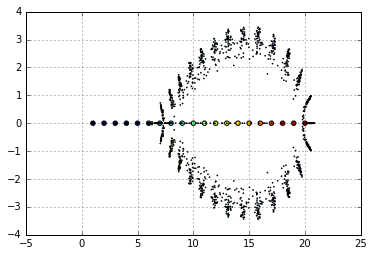

         283738 function calls (273098 primitive calls) in 0.254 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-11-47940e5d4cf5>:10(<module>)
        1    0.000    0.000    0.000    0.000 <ipython-input-11-47940e5d4cf5>:11(<module>)
        1    0.000    0.000    0.040    0.040 <ipython-input-11-47940e5d4cf5>:12(<module>)
        1    0.000    0.000    0.092    0.092 <ipython-input-11-47940e5d4cf5>:15(<module>)
        1    0.000    0.000    0.000    0.000 <ipython-input-11-47940e5d4cf5>:16(<module>)
        1    0.000    0.000    0.000    0.000 <ipython-input-11-47940e5d4cf5>:17(<module>)
      200    0.000    0.000    0.001    0.000 _methods.py:40(_all)
      131    0.000    0.000    0.004    0.000 add.py:16(_addsort)
       76    0.000    0.000    0.000    0.000 add.py:335(as_coeff_Add)
       19    0.000    0.000    0.000    0.000 add.py:450(<lambda>)
       

In [11]:
import numpy as np
from sympy import Symbol
from sympy.polys.polytools import   poly_from_expr
import matplotlib.pyplot as plt
import cProfile,pstats

pr=cProfile.Profile()

pr.enable()
x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x-i)

P,d = poly_from_expr(W.expand())
p = P.all_coeffs()
pr.disable()
print p
x = np.arange(1, 21)
plt.scatter(x,np.zeros(20),c=x)


for l in xrange(0,100):
    pr.enable()
    ptilde=p*(1+1E-11*np.random.rand(21))

    roots=np.roots(ptilde)
    pr.disable()

    X = roots.real 
    Y = roots.imag 
    plt.scatter(X,Y, c=x, s=.5)

roots=np.roots(p)

print roots

plt.grid()    
plt.show()
pr.print_stats()